In [1]:
# Import the dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    
    print(coordinate[0], coordinate[1])

37.92348768548837 -47.824744885554566
-82.71285235086832 -48.81935351883601
-68.11691917284307 -155.6199626361166
17.75309056633391 -22.45132800208404
26.405232443135958 18.024690367149816
-51.442714691037686 -121.74794346576014
44.792862452906206 86.35966033662561
-1.9292806561357025 78.7175918803282
24.15200743913256 121.59278449351729
88.41700396741027 170.6358097698153
62.07879346733711 132.8978791571019
85.22993070534218 95.43093321076634
60.66917520602894 -111.49605111420729
63.45409320505374 172.11364523707465
84.42987203834639 -106.20359099049398
-21.173880474246545 163.65474044136295
18.700602033805353 7.533418344905556
-85.16244783516231 86.60070767821185
-1.8296120879114852 118.8385096832057
47.639460170975894 -102.54178561584172
41.54481026234865 -3.828836998387942
54.4254840379366 -36.38387425339499
87.83974791986992 -16.58691183545841
26.610450527316004 -47.385853862772365
-38.39147376414196 -34.11124437572943
74.37067253044845 -140.84538016344572
-29.51801260278677 -84.2

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    
    
    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
        
        
# Print the city count to confirm sufficient count.

len(cities)

613

In [9]:
# Import the time library and the datetime module from the datetime library 

import time

from datetime import datetime

In [10]:
# Import the requests library.

import requests

# Import the API key.

from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters.

record_count = 1

set_count = 1



# Loop through all the cities in our list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        

 
    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")
    

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    
    # Add 1 to the record count.
    
    record_count += 1
    
    
# Run an API request for each of the cities.

    try:
        
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          
                          "Lat": city_lat,
                          
                          "Lng": city_lng,
                          
                          "Max Temp": city_max_temp,
                          
                          "Humidity": city_humidity,
                          
                          "Cloudiness": city_clouds,
                          
                          "Wind Speed": city_wind,
                          
                          "Country": city_country,
                          
                          "Date": city_date})

        
        
        
# If an error is experienced, skip the city.

    except:
        
        print("City not found. Skipping...")
        
        pass

    
    
    

# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | torbay
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | santa maria
Processing Record 5 of Set 1 | waddan
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | shihezi
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | suao
City not found. Skipping...
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | churapcha
Processing Record 12 of Set 1 | khatanga
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | koumac
Processing Record 16 of Set 1 | arlit
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | palu
Processing Record 19 of Set 1 | dickinson
Processing Record 20 of Set 1 | aranda de duero
Processing Record 21 of Set 1 | nanortalik
Processing Record 22 of Set 1 | illoqqortoormiut
City not found. Sk

Processing Record 40 of Set 4 | east london
Processing Record 41 of Set 4 | smirnykh
Processing Record 42 of Set 4 | yulara
Processing Record 43 of Set 4 | tiksi
Processing Record 44 of Set 4 | cherskiy
Processing Record 45 of Set 4 | rungata
City not found. Skipping...
Processing Record 46 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 4 | ketchikan
Processing Record 48 of Set 4 | pisco
Processing Record 49 of Set 4 | port elizabeth
Processing Record 50 of Set 4 | laguna
Processing Record 1 of Set 5 | shatrovo
Processing Record 2 of Set 5 | adrar
Processing Record 3 of Set 5 | namibe
Processing Record 4 of Set 5 | talnakh
Processing Record 5 of Set 5 | padang
Processing Record 6 of Set 5 | smithers
Processing Record 7 of Set 5 | nikolskoye
Processing Record 8 of Set 5 | castro
Processing Record 9 of Set 5 | mwinilunga
Processing Record 10 of Set 5 | henties bay
Processing Record 11 of Set 5 | sao joao da barra
Processing Record 12 of Set 5 | 

Processing Record 30 of Set 8 | hay river
Processing Record 31 of Set 8 | san jeronimo
Processing Record 32 of Set 8 | ancud
Processing Record 33 of Set 8 | talara
Processing Record 34 of Set 8 | saint-louis
Processing Record 35 of Set 8 | stratford
Processing Record 36 of Set 8 | zhitikara
City not found. Skipping...
Processing Record 37 of Set 8 | den helder
Processing Record 38 of Set 8 | roebourne
Processing Record 39 of Set 8 | pombas
Processing Record 40 of Set 8 | celestun
Processing Record 41 of Set 8 | margate
Processing Record 42 of Set 8 | manakara
Processing Record 43 of Set 8 | curup
Processing Record 44 of Set 8 | dutse
Processing Record 45 of Set 8 | vostok
Processing Record 46 of Set 8 | flin flon
Processing Record 47 of Set 8 | houston
Processing Record 48 of Set 8 | vavoua
Processing Record 49 of Set 8 | kundiawa
Processing Record 50 of Set 8 | pedasi
Processing Record 1 of Set 9 | luderitz
Processing Record 2 of Set 9 | kasimov
Processing Record 3 of Set 9 | kahului


Processing Record 15 of Set 12 | anklam
Processing Record 16 of Set 12 | pyapon
Processing Record 17 of Set 12 | tazovskiy
Processing Record 18 of Set 12 | boyolangu
Processing Record 19 of Set 12 | temaraia
City not found. Skipping...
Processing Record 20 of Set 12 | luwuk
Processing Record 21 of Set 12 | la ronge
Processing Record 22 of Set 12 | avera
Processing Record 23 of Set 12 | uwayl
City not found. Skipping...
Processing Record 24 of Set 12 | faya
Processing Record 25 of Set 12 | wewak
Processing Record 26 of Set 12 | zhuanghe
Processing Record 27 of Set 12 | polunochnoye
Processing Record 28 of Set 12 | ampanihy
Processing Record 29 of Set 12 | coihaique
Processing Record 30 of Set 12 | lososina
Processing Record 31 of Set 12 | bijar
Processing Record 32 of Set 12 | makakilo city
Processing Record 33 of Set 12 | mendahara
City not found. Skipping...
Processing Record 34 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 35 of Set 12 | prince albert
Processing 

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,65.57,83,80,5.99,CA,2022-08-01 05:03:20
1,Ushuaia,-54.8000,-68.3000,37.06,93,20,6.91,AR,2022-08-01 05:03:15
2,Mataura,-46.1927,168.8643,48.47,74,92,6.13,NZ,2022-08-01 05:06:31
3,Santa Maria,-29.6842,-53.8069,50.65,93,0,2.84,BR,2022-08-01 05:06:10
4,Waddan,29.1614,16.1390,77.40,51,0,2.48,LY,2022-08-01 05:06:32
5,Rikitea,-23.1203,-134.9692,72.54,74,99,25.64,PF,2022-08-01 05:06:32
6,Shihezi,44.3000,86.0333,88.48,25,8,3.38,CN,2022-08-01 05:06:33
7,Hithadhoo,-0.6000,73.0833,81.12,71,93,15.26,MV,2022-08-01 05:06:33
8,Pevek,69.7008,170.3133,55.15,47,1,9.33,RU,2022-08-01 05:06:34
9,Churapcha,62.0025,132.4325,88.14,32,100,9.40,RU,2022-08-01 05:06:34


In [14]:
# Reorder columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Torbay,CA,2022-08-01 05:03:20,47.6666,-52.7314,65.57,83,80,5.99
1,Ushuaia,AR,2022-08-01 05:03:15,-54.8000,-68.3000,37.06,93,20,6.91
2,Mataura,NZ,2022-08-01 05:06:31,-46.1927,168.8643,48.47,74,92,6.13
3,Santa Maria,BR,2022-08-01 05:06:10,-29.6842,-53.8069,50.65,93,0,2.84
4,Waddan,LY,2022-08-01 05:06:32,29.1614,16.1390,77.40,51,0,2.48
5,Rikitea,PF,2022-08-01 05:06:32,-23.1203,-134.9692,72.54,74,99,25.64
6,Shihezi,CN,2022-08-01 05:06:33,44.3000,86.0333,88.48,25,8,3.38
7,Hithadhoo,MV,2022-08-01 05:06:33,-0.6000,73.0833,81.12,71,93,15.26
8,Pevek,RU,2022-08-01 05:06:34,69.7008,170.3133,55.15,47,1,9.33
9,Churapcha,RU,2022-08-01 05:06:34,62.0025,132.4325,88.14,32,100,9.40


In [15]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"


# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

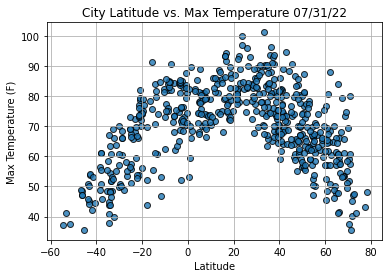

In [17]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            
            max_temps,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)



# Save the figure.

plt.savefig("weather_data/Fig1.png")


# Show plot.

plt.show()

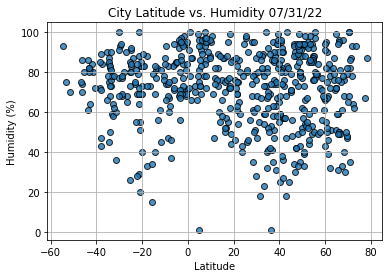

In [18]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            
            humidity,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)



# Save the figure.

plt.savefig("weather_data/Fig2.png")



# Show plot.

plt.show()

In [ ]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            
            cloudiness,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig3.png")


# Show plot.
plt.show()